<a href="https://colab.research.google.com/github/Nguyen-The-Thanh/NguyenTheThanh_training_FMlab/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Các nội dung chính
1. Mục tiêu:
*   Nắm được các bước cơ bản trong khâu tiền xử lí dữ liệu.


2. Dữ liệu:
* Dữ liệu bất động sản - *Bengaluru_House_Data*
> Gồm các trường dữ liệu: location, size, total_sqft, price, ...


> Link Kaggle: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data




3. Yêu cầu:
* Sử dụng các công cụ (Pandas, Seaborn, ...) để thực hiện xem xét, đánh giá đặc điểm của dữ liệu, từ đó đưa ra phương án tiền xử lí dữ liệu (làm sạch, trích xuất thông tin ban đầu, ...)




# Nội dung thực hành

### Import Libraries

In [2]:
import numpy as np
import pandas as pd #Giúp làm việc với các dữ liệu dạng bảng
import matplotlib.pyplot as plt #Thư viện hỗ trợ trực quan hóa dữ liệu
import seaborn as sns #Thư viện giúp trực quan hóa dữ liệu, được xây trên matplotlib

### Load dataset

1. Đọc dữ liệu bằng pandas, dạng dataframe

In [3]:
path = "Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

2. Review 5 sample đầu tiên

In [4]:
df_raw.head() # return DataFrame

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


3. Review 5 sample cuối cùng

In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### Exploratory Data Analysis (EDA)

In [6]:
df = df_raw.copy() #Tạo bản sao để thực hiện EDA

1. Thông tin cơ bản về dữ liệu, tên trường, số giá trị non-null của từng trường, kiểu dữ liệu của từng trường

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


2. Thống kê 1 số thuộc tính cơ bản của dữ liệu, bao gồm count, mean, std, min, max, quartile

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


3. Thống kê các giá trị duy nhất của từng trường và số lần xuất hiện của chúng

In [9]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64


4. Xem xét tương quan về giá trị của các cặp trường số

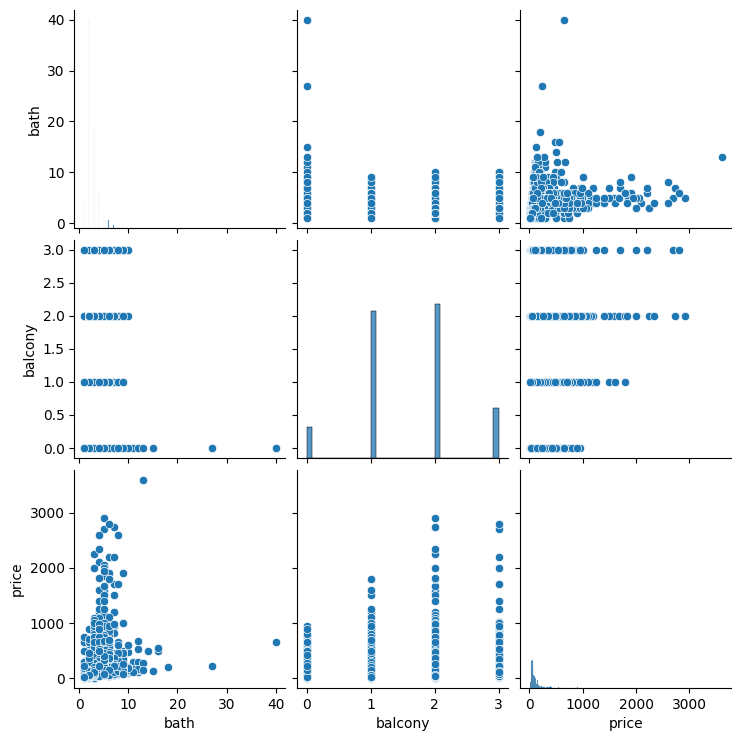

In [10]:
sns.pairplot(df)

<Axes: >

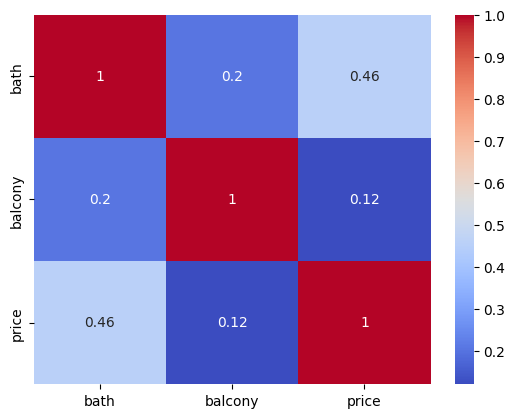

In [11]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

Prepare Data for Machine Learning Model

#### Data cleaning

1. Thống kê số lượng và tỉ lệ giá trị null của từng thuộc tính

In [12]:
df.isnull().sum() #So luong gia tri null cua tung thuoc tinh

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [13]:
df.isnull().mean()*100  # Tỷ lệ giá trị null của từng thuộc tính

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


2. Loại đi trường society vì tỉ lệ null cao (41%)

In [14]:
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

3. Thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

In [15]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


4. Xóa đi các điểm dữ liệu (hàng) có giá trị nan (không có giá trị)

In [16]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [17]:
df3.isnull().sum() #Thống kê lại xem đã xử lí hết các dữ liệu null hay chưa?

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


#### Feature Engineering

In [18]:
#Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

1. Converting 'total_sqft' cat feature in numeric

In [19]:
df3['total_sqft'].value_counts()

,count
total_sqft,
1200,843
1100,221
1500,204
2400,195
600,180
1000,172
1350,132
1050,123
1300,117


2. Chuyển trường total_sqft thành kiểu float

In [20]:
total_sqft_float = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_float.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-') # Tách dữ liệu dạng string thành 2 string con, delimiter là -
      total_sqft_float.append((float(temp[0])+float(temp[-1]))/2) # Lấy giá trị trung bình đối với các giá trị có dạng khoảng
    except:
      total_sqft_float.append(np.nan)

In [21]:
df4 = df3.reset_index(drop=True)

3. Thêm trường total_sqft kiểu float

In [22]:
df5 = df4.join(pd.DataFrame({'total_sqft_float':total_sqft_float}))
df5.head() #Quan sát kết quả sau khi xử lí

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


6. Thông tin về số điểm dữ liệu null của từng trường

In [23]:
df5.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
total_sqft_float,46


7. Bỏ đi các điểm dữ liệu (hàng) có giá trị null

In [24]:
df6 = df5.dropna()
df6.shape

(13200, 9)

8. Xem lại thông tin của dataframe

In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


9. Làm việc với feature: *size*

In [26]:
# Quan sát sự phân bố giá trị của trường 'size' với value_counts
df6['size'].value_counts()

,count
size,
2 BHK,5192
3 BHK,4277
4 Bedroom,816
4 BHK,574
3 Bedroom,541
1 BHK,527
2 Bedroom,325
5 Bedroom,293
6 Bedroom,190


In [27]:
#Chuyển thuộc tính số phòng từ dạng category về dạng numeric,
size_int = []
for str_val in df6['size']:
  temp = []
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ", str_val)

In [28]:
#Đánh lại index cho các hàng theo dãy số tự nhiên liên tiếp
df6 = df6.reset_index(drop=True)

In [29]:
# Thêm trường dữ liệu số phòng (bhk)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [30]:
#In ra kết quả thực hiện các thao tác kể trên?
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


10. Finding Outlier and Removing
* Dựa trên biểu đồ boxplot vừa thực hiện ở trên/ hoặc công cụ khác để phát hiện và loại bỏ các điểm ngoại lai:

<Axes: xlabel='total_sqft_float'>

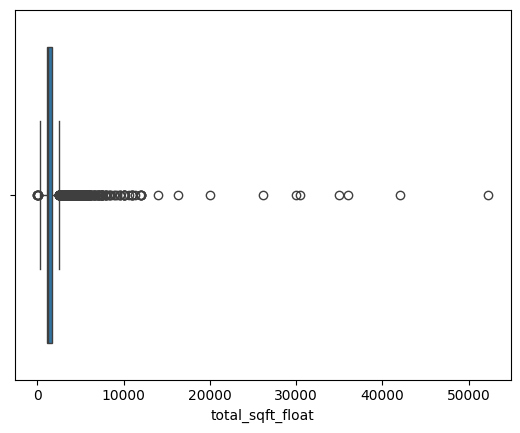

In [31]:
# Xem xét trường diện tích:
sns.boxplot(x = df7['total_sqft_float'])

In [32]:
# Chọn ngưỡng diện tích là 350 để xem xét
df7[df7['total_sqft_float']/df7['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [33]:
# Loại bỏ đi các điểm dữ liệu có diện tích phòng trung bình >= 350 ???
df8 = df7[~(df7['total_sqft_float']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [34]:
# Tạo thêm trường dữ liệu price_per_sqft (giá/ diện tích feet vuông)
df8 = df7[~(df7['total_sqft_float']/df7['bhk'] < 350)].copy()
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_float']

df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [35]:
df8.price_per_sqft.describe()

,price_per_sqft
count,12106.000000
mean,6184.466889
std,4019.983503
min,267.829813
25%,4200.030048
50%,5261.108523
75%,6800.000000
max,176470.588235


# Bài tập bổ sung (homework)

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

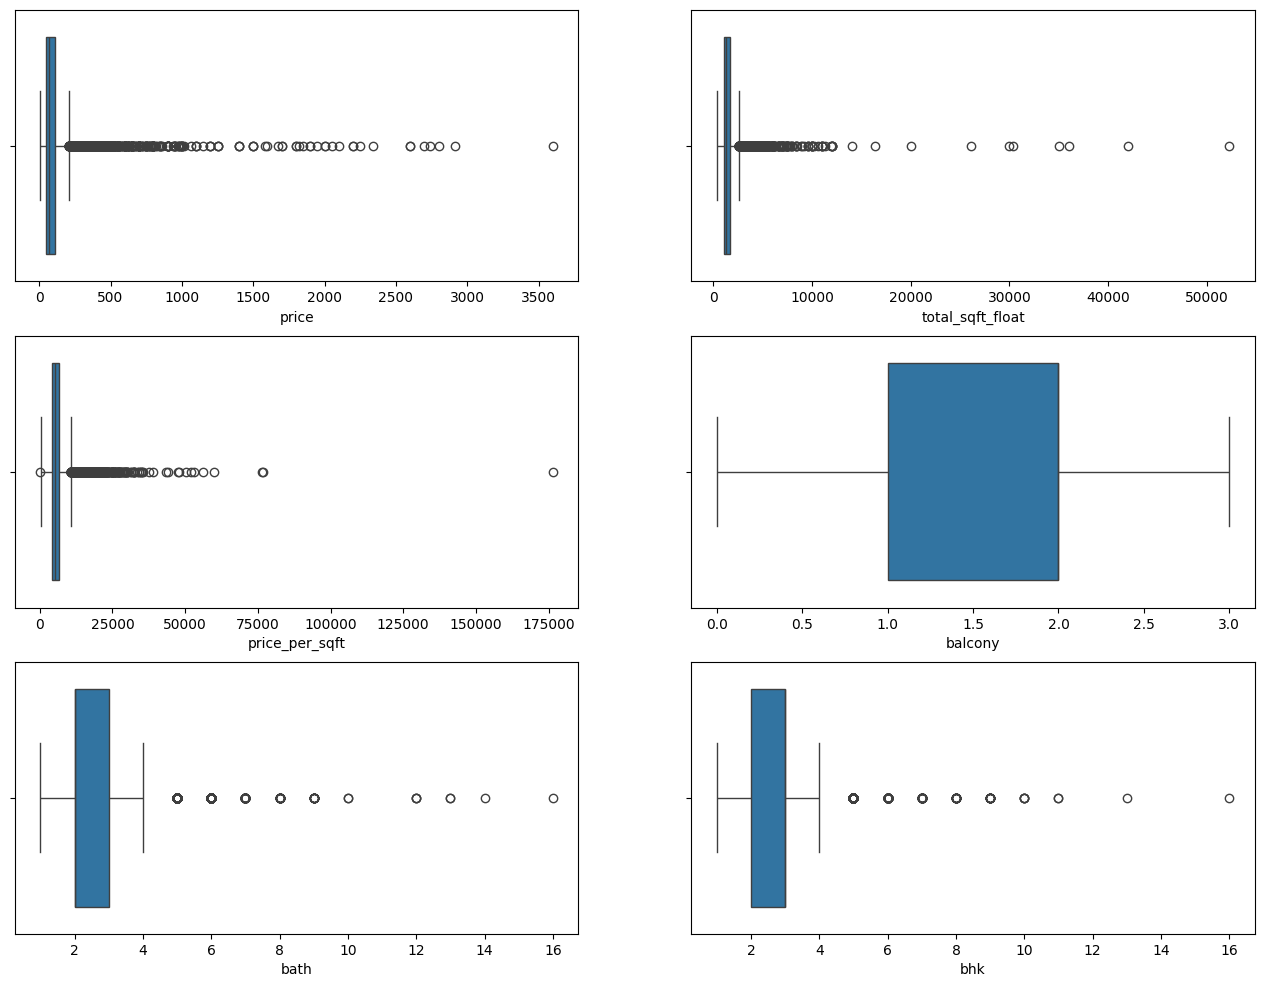

In [62]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu và phát hiện ngoại lai của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))
for c in vars:
  plt.subplot(3, 2, vars.index(c)+1)
  sns.boxplot(x=df8[c])

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [37]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft >= m-st) & (subdf.price_per_sqft <= m+st)]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

#--------
df9 = remove_pps_outliers(df8)
df9.shape

(9421, 11)

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. *Quy tắc loại bỏ outlier: xét các nhà có số phòng ngủ X trong cùng một vùng, nếu giá trên một feet vuông nhỏ hơn trung bình giá trên một feet vuông của tập các nhà có X-1 phòng ngủ thì sẽ là outlier. (Số lượng loại nhà X-1 phòng ngủ cần > 5).

In [38]:
# def remove_bhk_outliers(df):
#   df_out = pd.DataFrame()
#   for key, subdf in df.groupby('bhk'):
#     m = np.mean(subdf.price_per_sqft)
#     st = np.std(subdf.price_per_sqft)
#     reduced_df = subdf[(subdf.price_per_sqft >= m-st) & (subdf.price_per_sqft <= m+st)]
#     df_out = pd.concat([df_out, reduced_df], ignore_index = True)
#     return df_out
# df10 = remove_bhk_outliers(df9)
# df10.shape

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')
df10 = remove_bhk_outliers(df9)
df10.shape

(7727, 11)

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [39]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 12!!!)

array([ 1.,  3.,  2.,  9., 12.,  4., 13.,  5.,  8.,  6.,  7., 16.])

In [61]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
1976,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
6162,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7507,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
8020,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [41]:
df11 = df10[df10.bath <= df10.bhk+2]
df11.shape

(7723, 11)

In [42]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Built-up Area,Ready To Move,Anekal,1 RK,351,1.0,1.0,16.0,351.0,1,4558.404558
1,Super built-up Area,Ready To Move,Banaswadi,1 RK,527,1.0,0.0,35.0,527.0,1,6641.366224
2,Super built-up Area,Ready To Move,Basavangudi,1 RK,670,1.0,1.0,50.0,670.0,1,7462.686567
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714


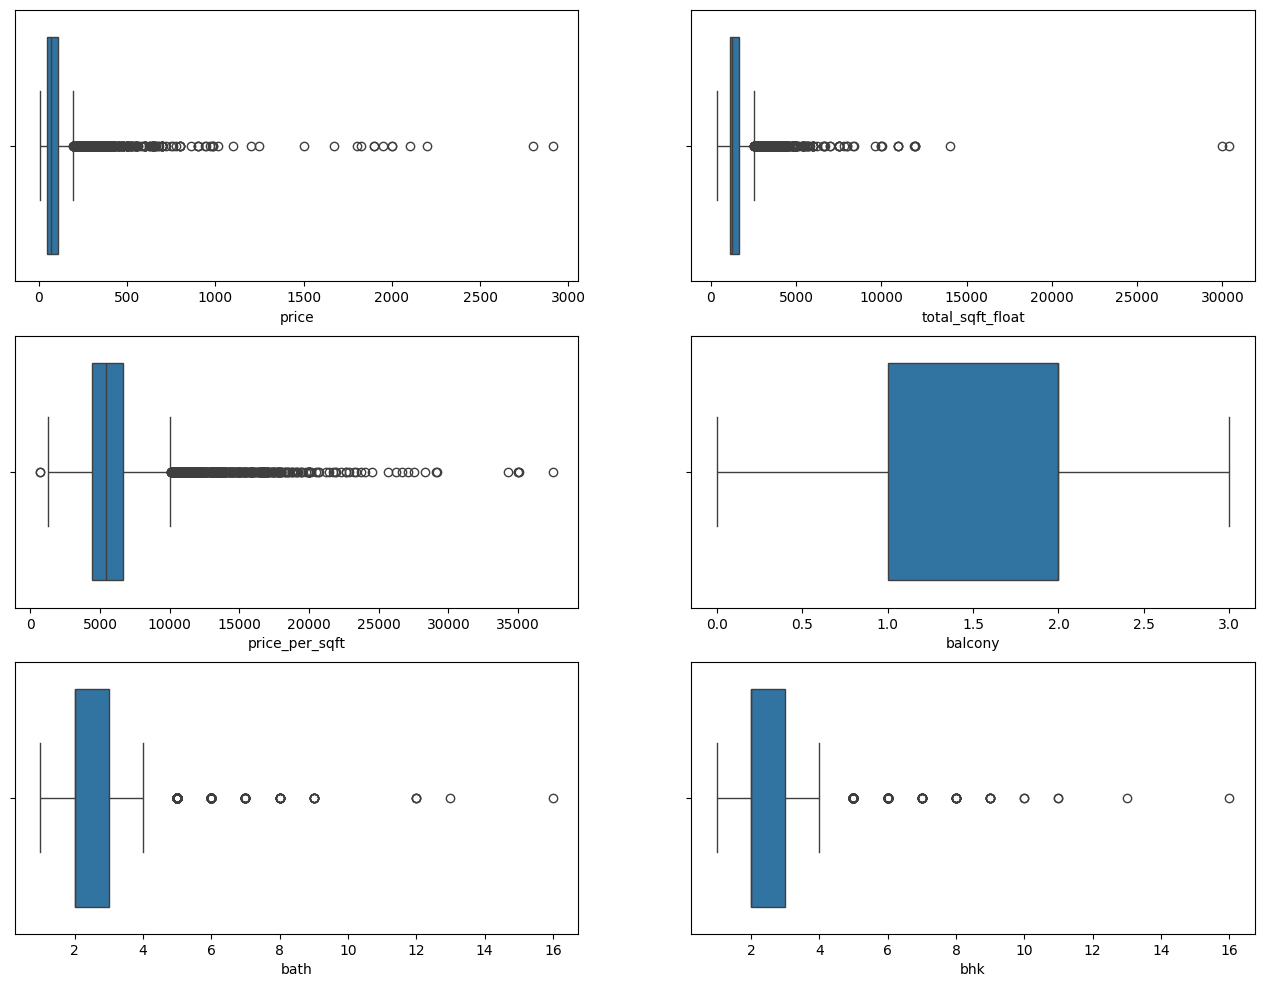

In [43]:
# Quan sat lai ket qua sau khi da xu ly
plt.figure(figsize=(16,12))
for i, var in enumerate(df11[vars]):
  plt.subplot(3, 2, i+1)
  sns.boxplot(x = df11[var])

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [44]:
df12 = df11.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis = 1)
df12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,1.0,1.0,16.0,351.0,1,4558.404558
1,1.0,0.0,35.0,527.0,1,6641.366224
2,1.0,1.0,50.0,670.0,1,7462.686567
3,3.0,2.0,150.0,1672.0,3,8971.291866
4,3.0,3.0,149.0,1750.0,3,8514.285714


In [45]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

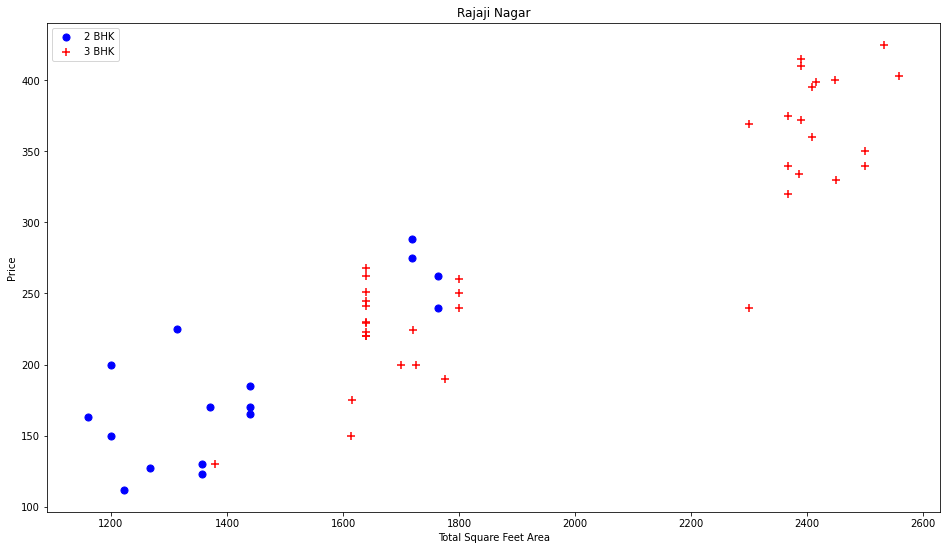

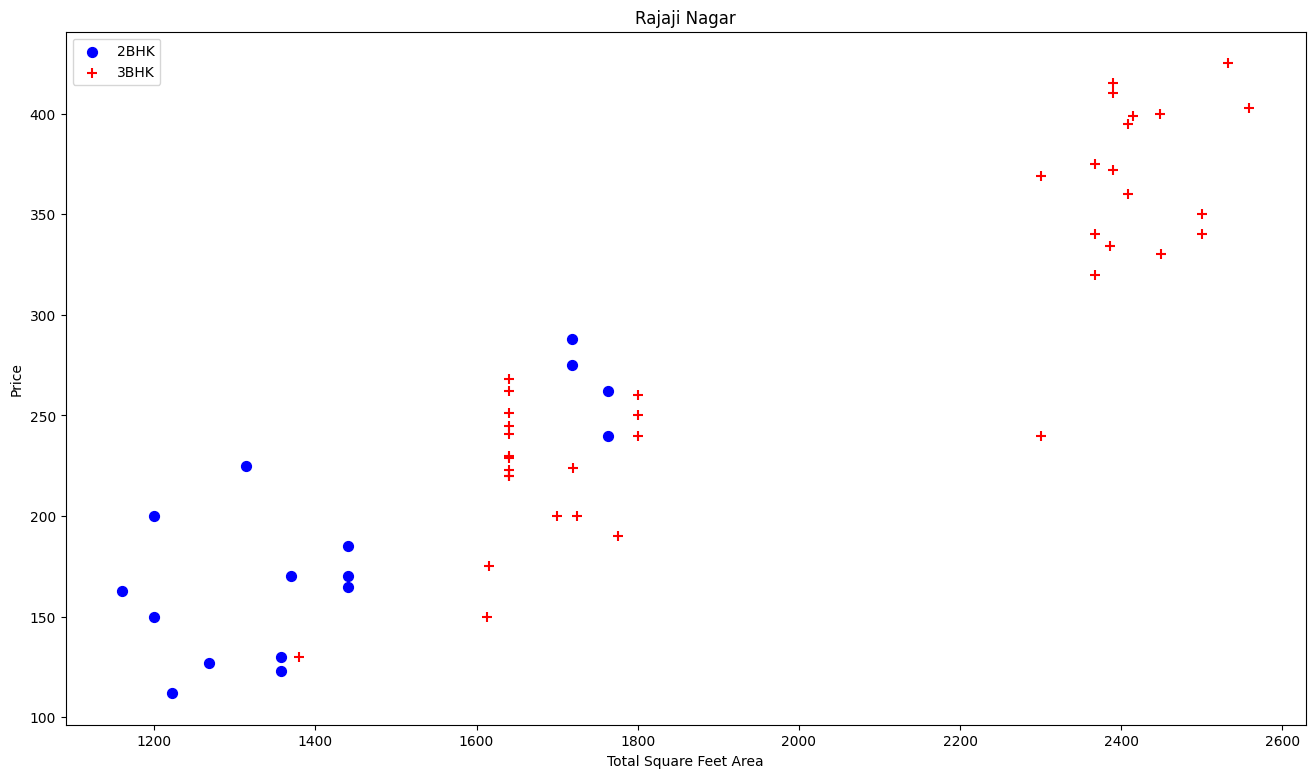

In [46]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location == location) & (df.bhk==2)]
  bhk3 = df[(df.location == location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_float, bhk2.price, color='blue', label='2BHK', s=50)
  plt.scatter(bhk3.total_sqft_float, bhk3.price, color='red', label='3BHK', s=50, marker='+')
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
  plt.show()
plot_scatter_chart(df9, "Rajaji Nagar")

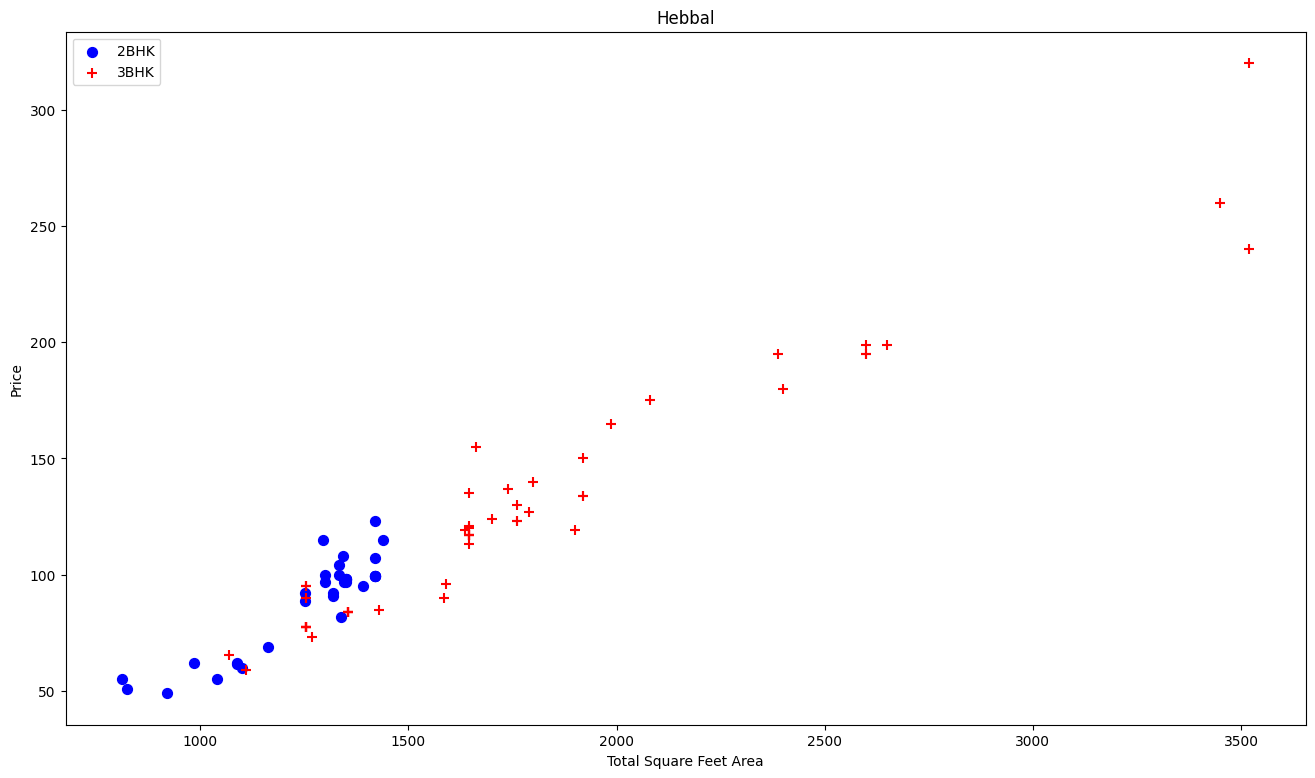

In [47]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

* Thống kê giá nhà theo từng loại khu vực (area_type). Làm với df9:
* xem xét theo từng khu vực, thì giá nhà trung bình (price_per_sqft) là bao nhiêu, tương quan về giá nhà trung bình giữa các khu vực

* Gợi ý: Phần này có thể đưa ra kết quả dạng bảng hoặc biểu đồ (cột, histogram, ...).
 - Sử dụng các lệnh: df.groupby(), df.sortvalues(), ... để trích xuất giá trị
 - Sử dụng matplotlib: plt.bar(), ...


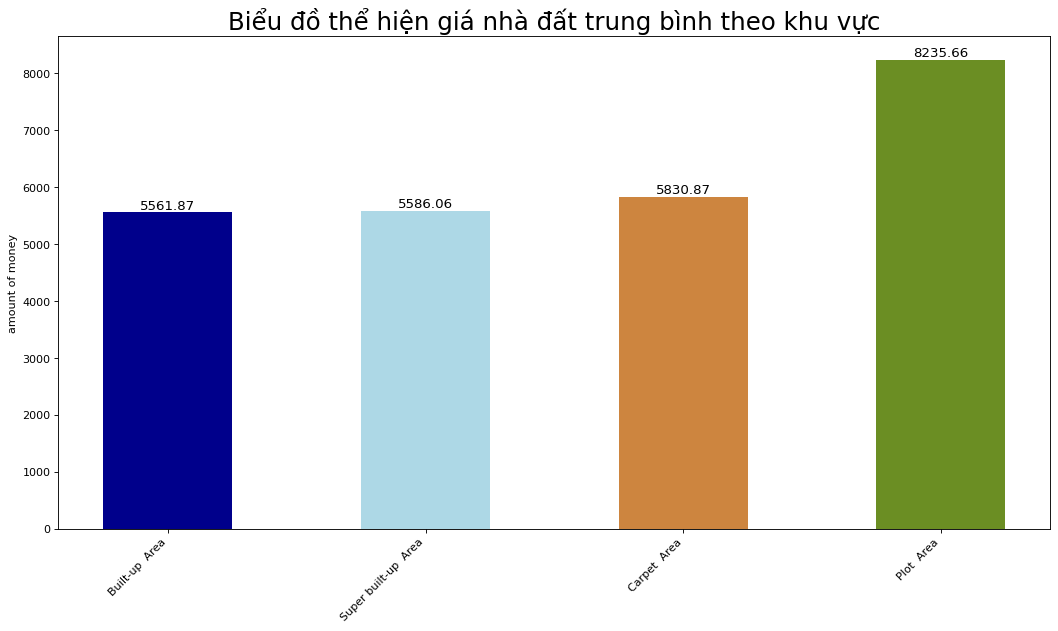

In [60]:
import random
df91 = df9.groupby('area_type')['price_per_sqft'].mean(). reset_index(name='money')
df91 = df91.sort_values(by = 'money')
df91['money'] = df91['money'].apply(lambda x : round(x, 2))
n = df91['area_type'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())

random.seed(100) #Chọn màu ngẫu nhiên cho các cột :)
c = random.choices(all_colors, k=n)

plt.figure(figsize = (16,8), dpi = 80)
plt.bar(df91['area_type'], df91['money'], color=c, width=.5)
for i, val in enumerate(df91['money'].values):
  plt.text(i, val, float(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'fontweight':500, 'size':12})

ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels(df91['area_type'], rotation=45, horizontalalignment='right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo khu vực", fontsize = 22)
plt.ylabel('amount of money')
# plt.ylim(25,35)
plt.show()